In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from  sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [6]:
df=pd.read_csv(r"/content/solarpowergeneration.csv")
df.shape

(2920, 10)

In [7]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [10]:
df.isnull().sum()

,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),1
average-pressure-(period),0
power-generated,0


In [ ]:

df["average-wind-speed-(period)"]=df["average-wind-speed-(period)"].fillna(df["average-wind-speed-(period)"].median())
df.isnull().sum()

,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),0
average-pressure-(period),0
power-generated,0


In [11]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [ ]:
def plot(col):

  mean=df[col].mean()
  median=df[col].median()
  std=df[col].std()
  skew=df[col].skew()
  min=df[col].min()
  max=df[col].max()

  print(f"Mean: {mean}")
  print(f"Median: {median}")
  print(f"Standard Deviation: {std}")
  print(f"Skewness: {skew}")
  print(f"Minimum: {min}")
  print(f"Maximum: {max}")


  plt.figure(figsize=(16,8))
  plt.subplots_adjust(hspace=0.5, wspace=0.5)

  # Subplot 1: Histogram (Fixed)
  plt.subplot(2,2,1)
  sns.distplot(df[col], color = 'b')
  plt.title(f"Distribution of {col}")

  # Subplot 2: Violin Plot
  plt.subplot(2,2,2)
  sns.violinplot(y=col, data=df, palette = 'Set2')
  plt.title(f"{col} violin plot")

  # Subplot 3: Boxplot
  plt.subplot(2,2,3)
  sns.boxplot(x=col, data=df, palette = 'tab10')
  plt.title(f"{col} Boxplot")


  # Subplot 4: KDE Plot
  plt.subplot(2,2,4)
  sns.kdeplot(x=col, data=df)
  plt.title(f'{col} Cumulative Density Distribution')

  plt.show()

### Uni - Variate Analysis

Mean: 58.46849315068493
Median: 59.0
Standard Deviation: 6.84120031203902
Skewness: 0.12591612509452638
Minimum: 42
Maximum: 78


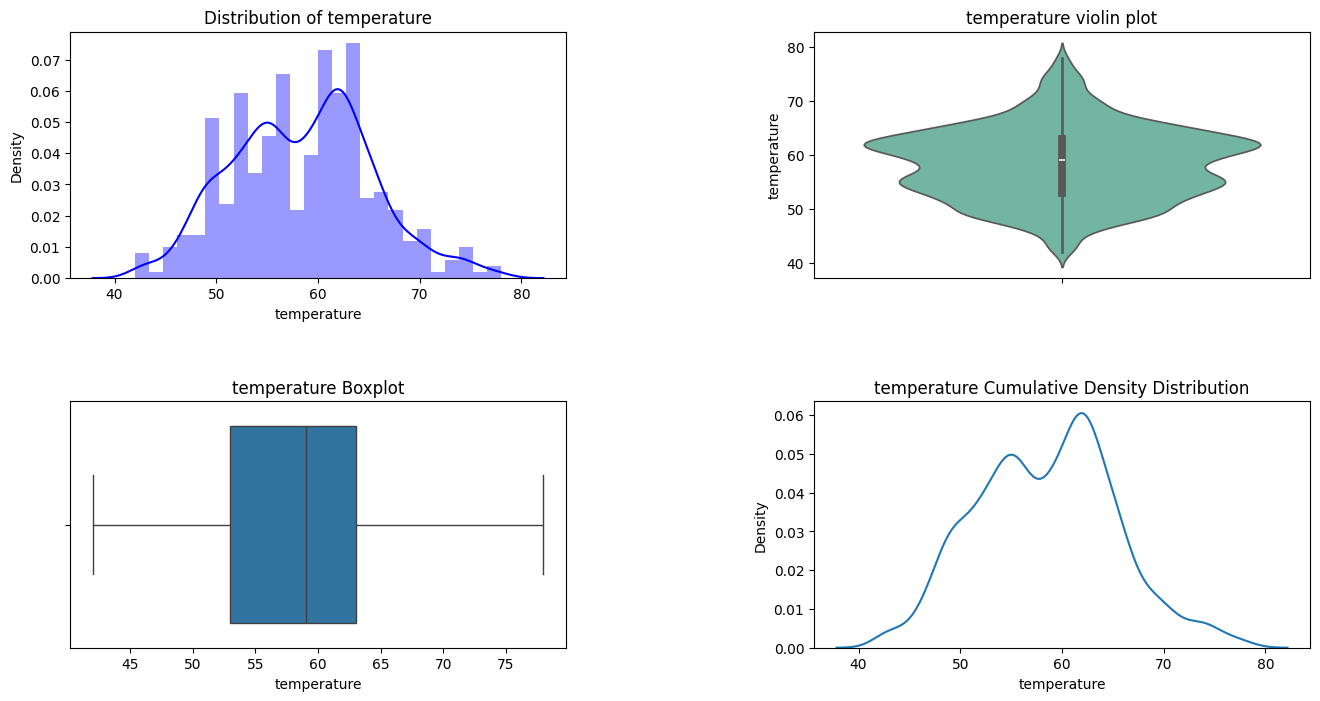

In [ ]:
plot("temperature")

Mean: 0.5032940280626712
Median: 0.47895689650000006
Standard Deviation: 0.298023544001734
Skewness: 0.21145184337509115
Minimum: 0.050400916
Maximum: 1.141361257


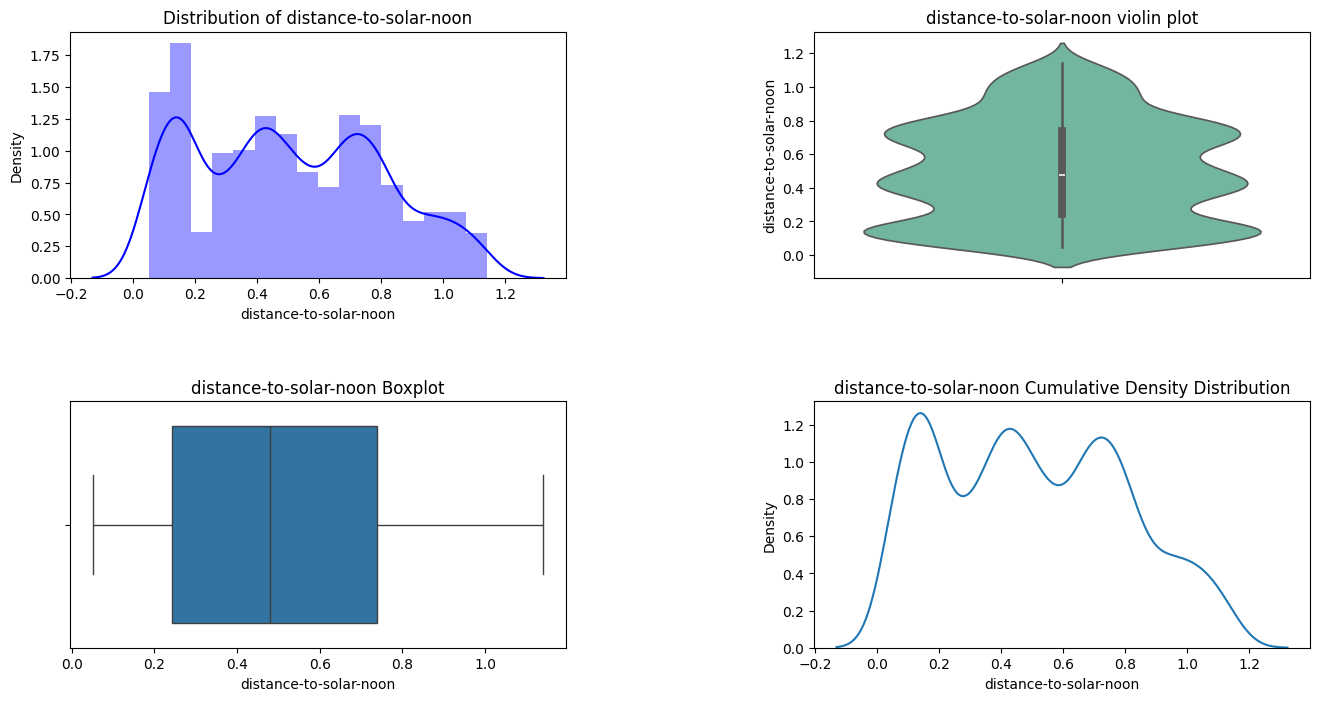

In [ ]:
plot("distance-to-solar-noon")

Mean: 24.953424657534246
Median: 27.0
Standard Deviation: 6.9151780016566375
Skewness: -1.6295192356486814
Minimum: 1
Maximum: 36


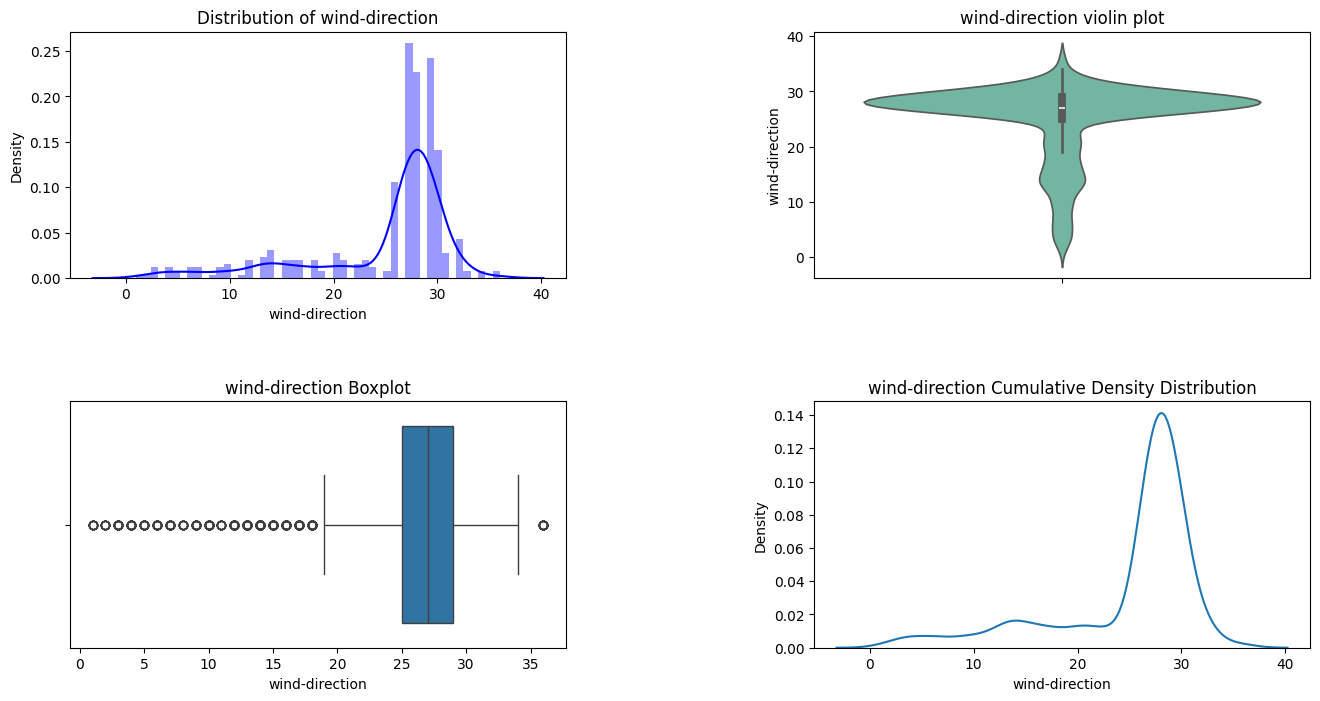

In [ ]:
plot("wind-direction")

Mean: 10.096986301369864
Median: 10.0
Standard Deviation: 4.838185069335722
Skewness: 0.41685132886363285
Minimum: 1.1
Maximum: 26.6


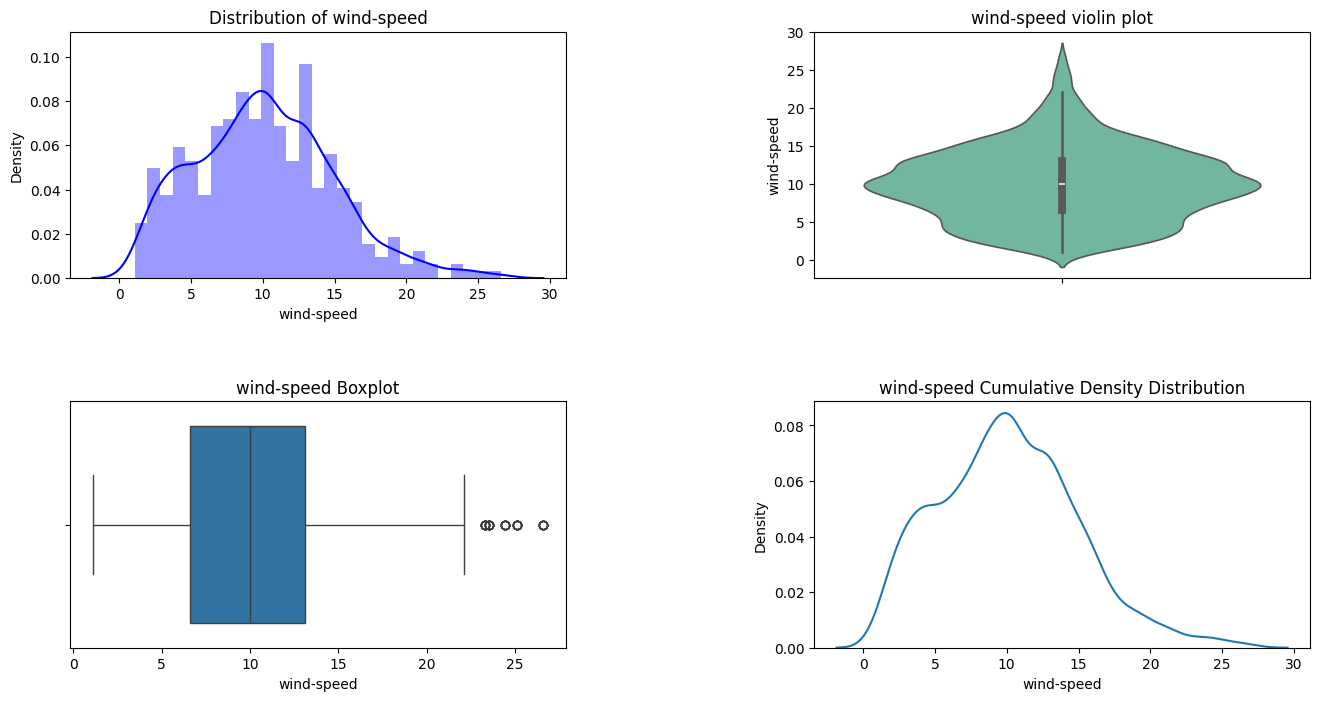

In [ ]:
plot("wind-speed")

Mean: 9.557705479452055
Median: 10.0
Standard Deviation: 1.3838837251314962
Skewness: -3.862446222918068
Minimum: 0.0
Maximum: 10.0


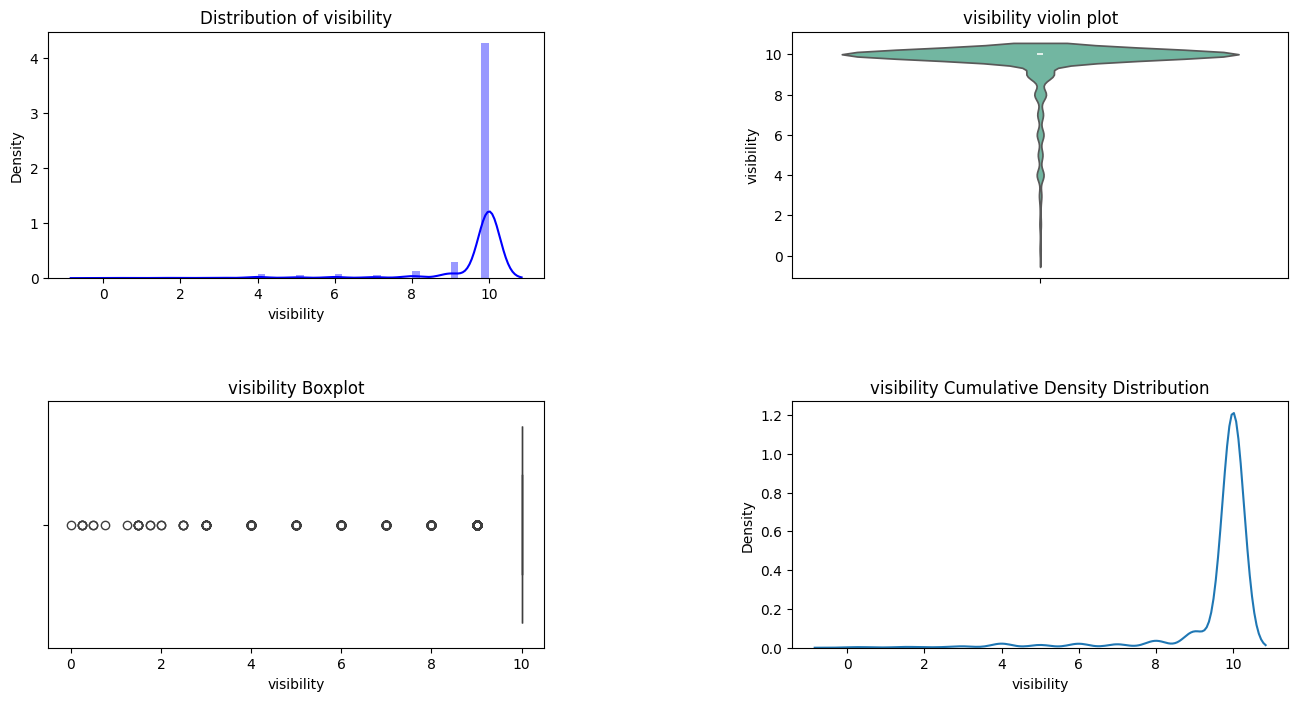

In [ ]:
plot("visibility")

In [ ]:
df["visibility"].value_counts()

,count
visibility,
10.00,2491
9.00,169
8.00,73
4.00,43
6.00,42
7.00,36
5.00,29
3.00,14
1.50,6


Mean: 73.51369863013699
Median: 77.0
Standard Deviation: 15.077139233278922
Skewness: -0.9556072100798612
Minimum: 14
Maximum: 100


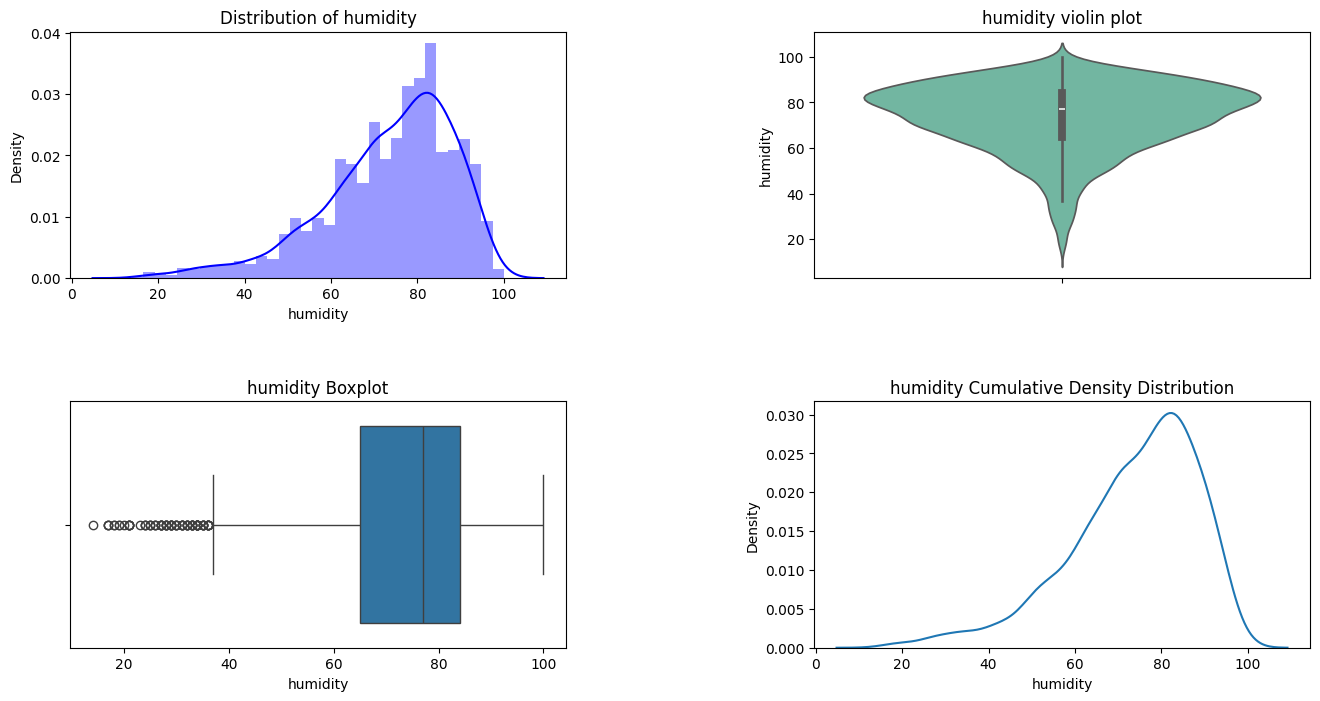

In [ ]:
plot("humidity")

Mean: 10.128767123287671
Median: 9.0
Standard Deviation: 7.2603326462477416
Skewness: 0.6231677856022435
Minimum: 0.0
Maximum: 40.0


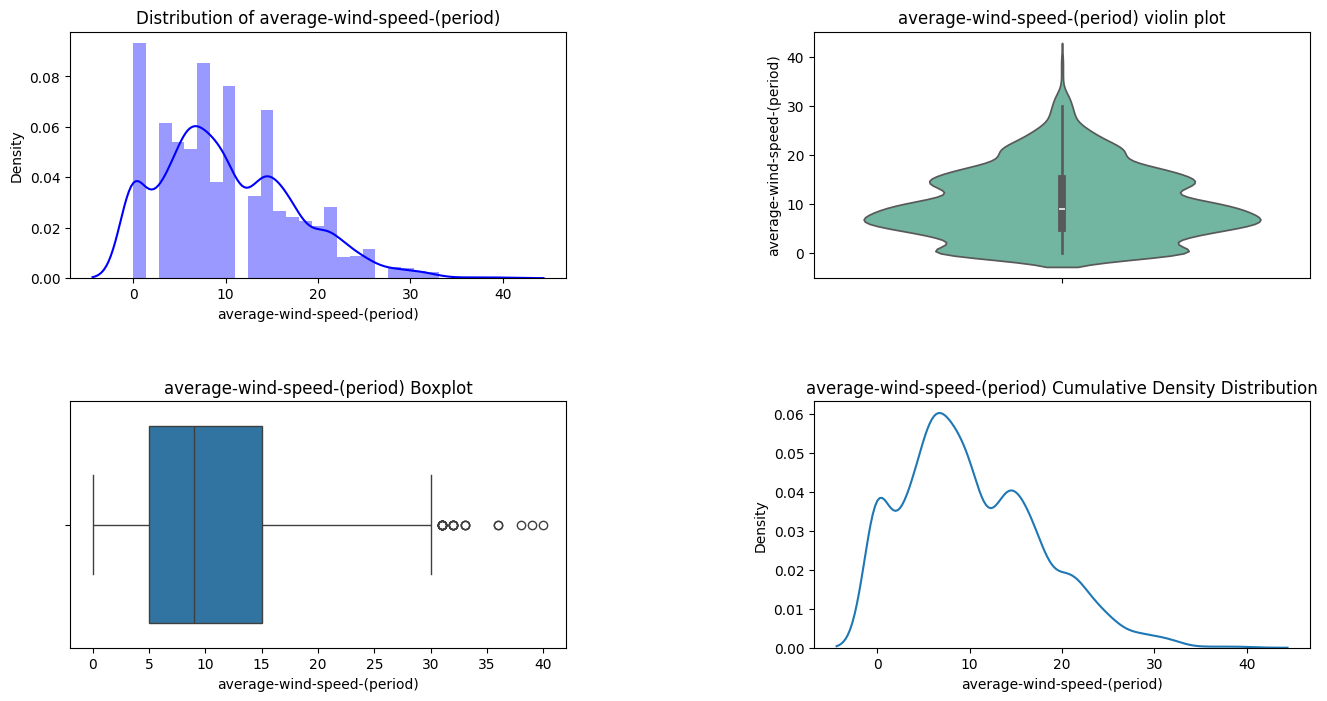

In [ ]:
plot("average-wind-speed-(period)")

Mean: 30.017760273972602
Median: 30.0
Standard Deviation: 0.14200583367403752
Skewness: 0.44138375067254937
Minimum: 29.48
Maximum: 30.53


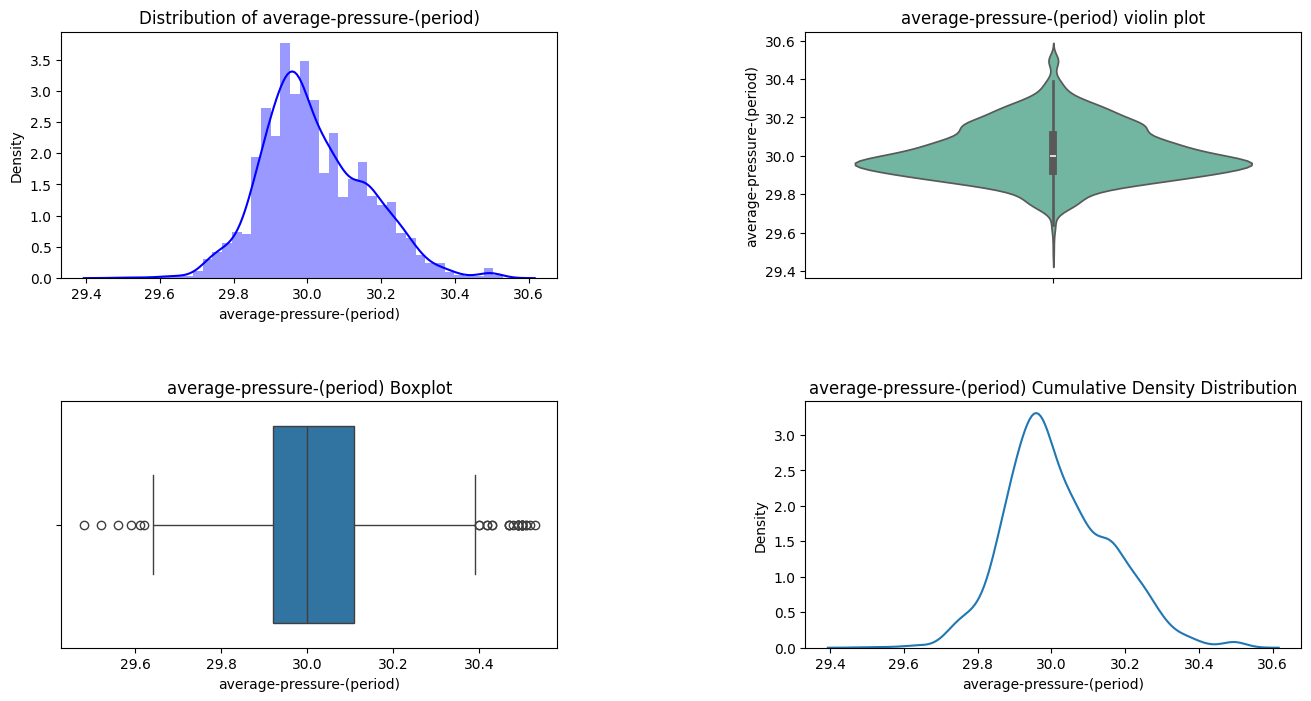

In [ ]:
plot("average-pressure-(period)")

Mean: 6979.846232876713
Median: 404.0
Standard Deviation: 10312.336413252273
Skewness: 1.3070350643796376
Minimum: 0
Maximum: 36580


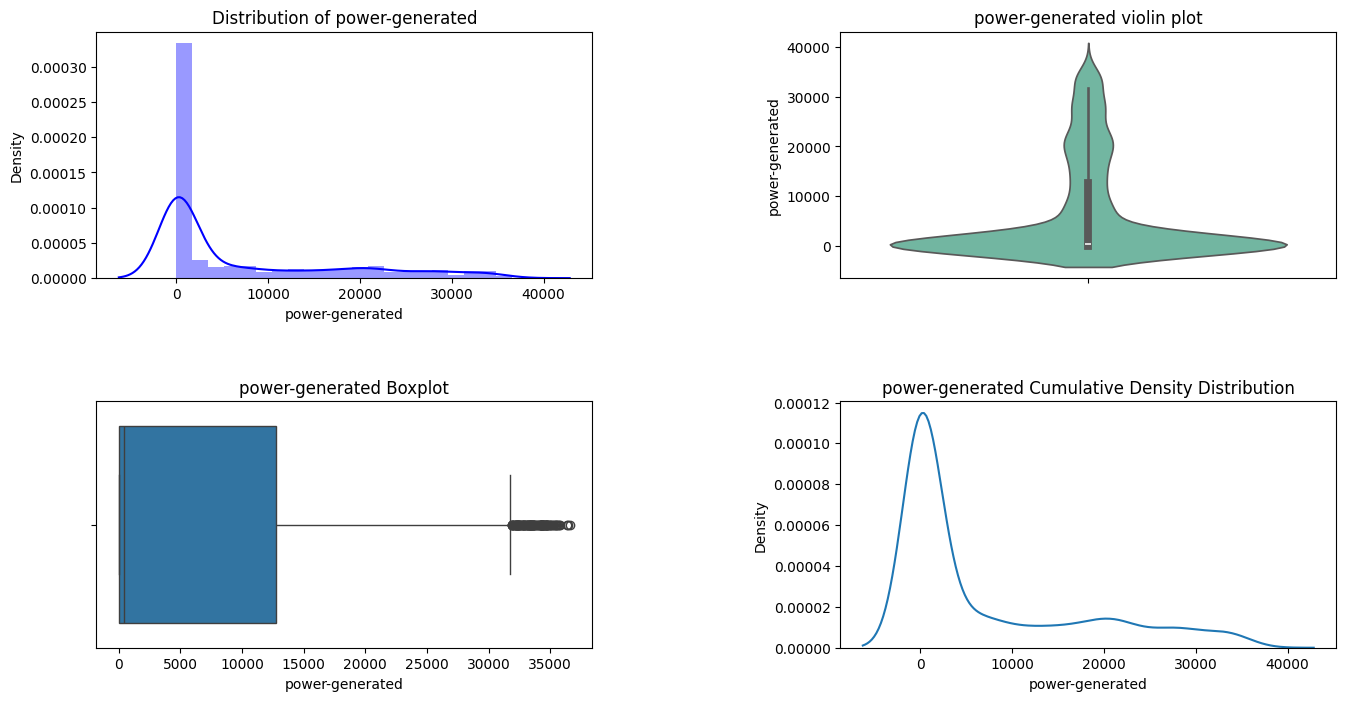

In [ ]:
plot("power-generated")

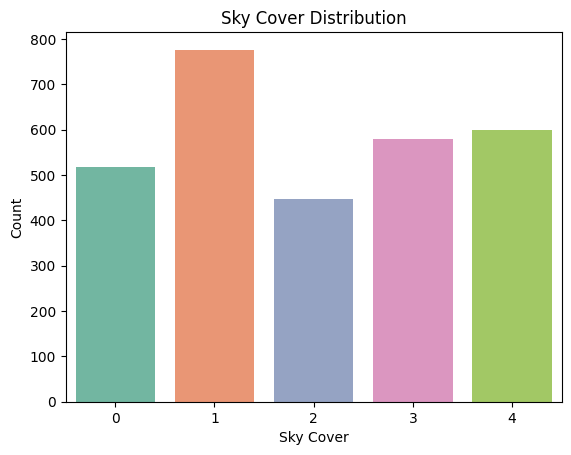

In [ ]:
sns.barplot(x=df["sky-cover"].value_counts().index, y=df["sky-cover"].value_counts().values,palette="Set2")
plt.xlabel("Sky Cover")
plt.ylabel("Count")
plt.title("Sky Cover Distribution")
plt.show()

### Bi-Variate Analysis

In [ ]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

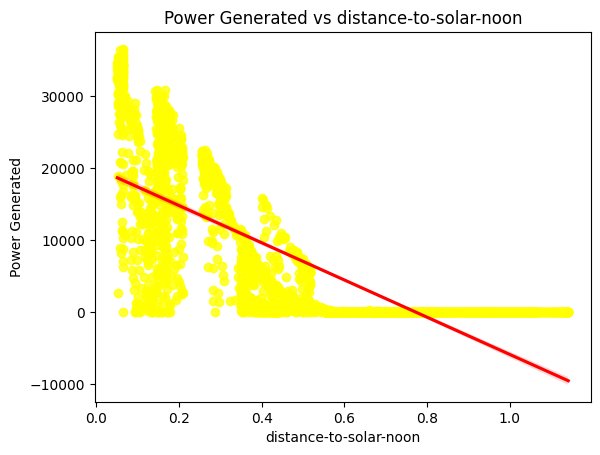

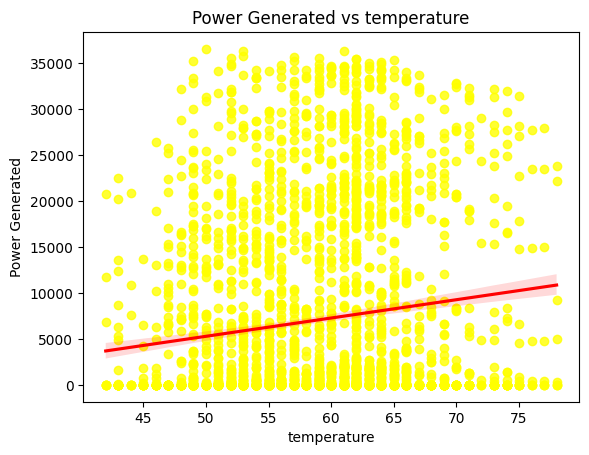

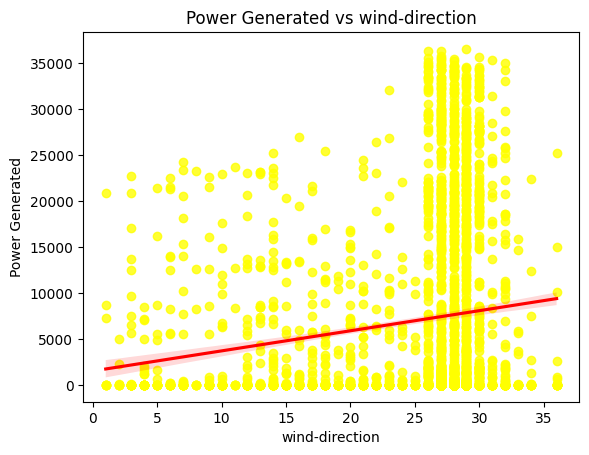

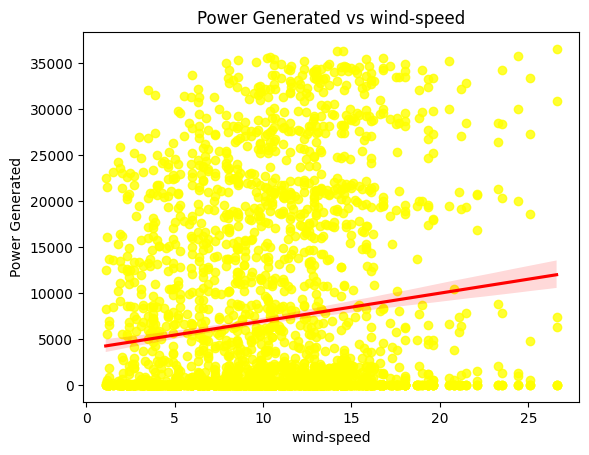

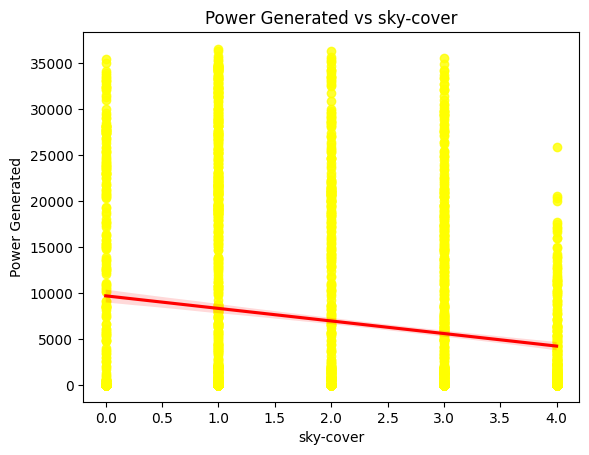

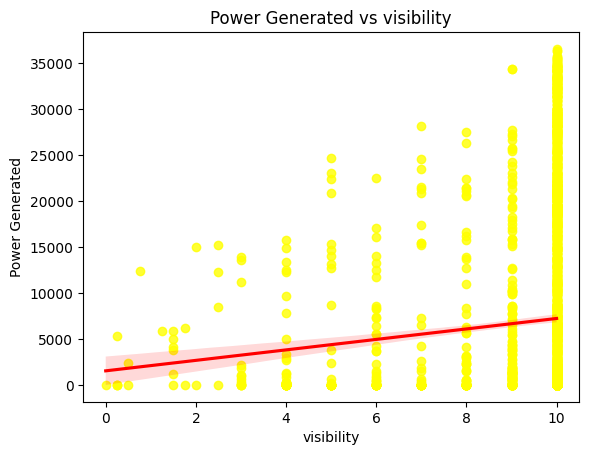

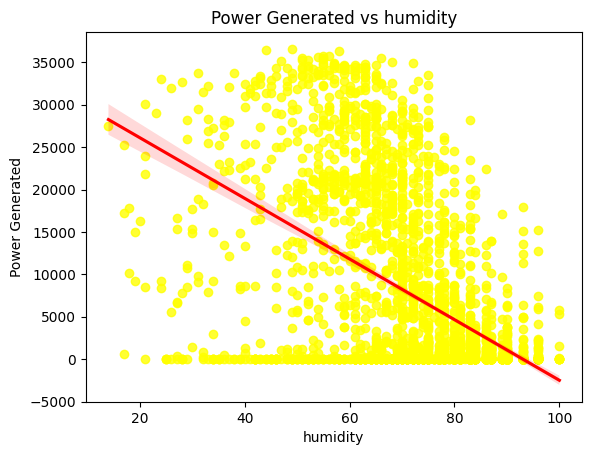

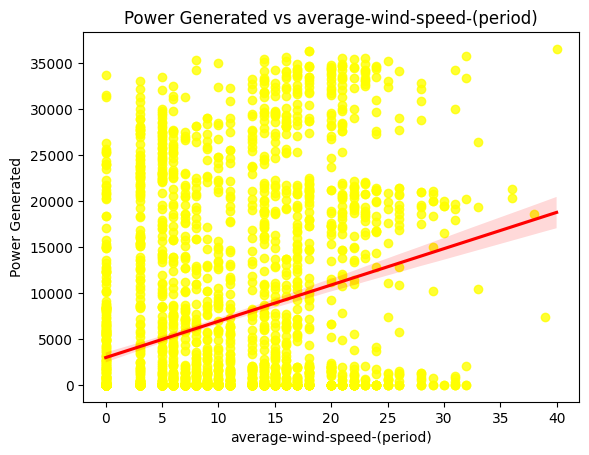

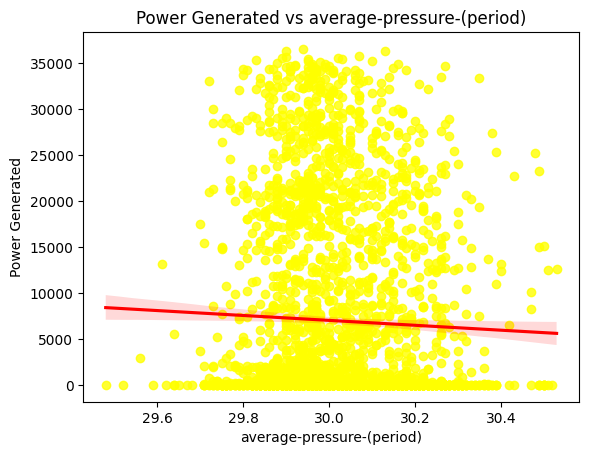

In [ ]:
for col in df[['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)']]:
       sns.regplot(x=col,y="power-generated",data=df,line_kws={"color": "red"},color="yellow")
       plt.title(f"Power Generated vs {col}")
       plt.xlabel(col)
       plt.ylabel("Power Generated")
       plt.show()

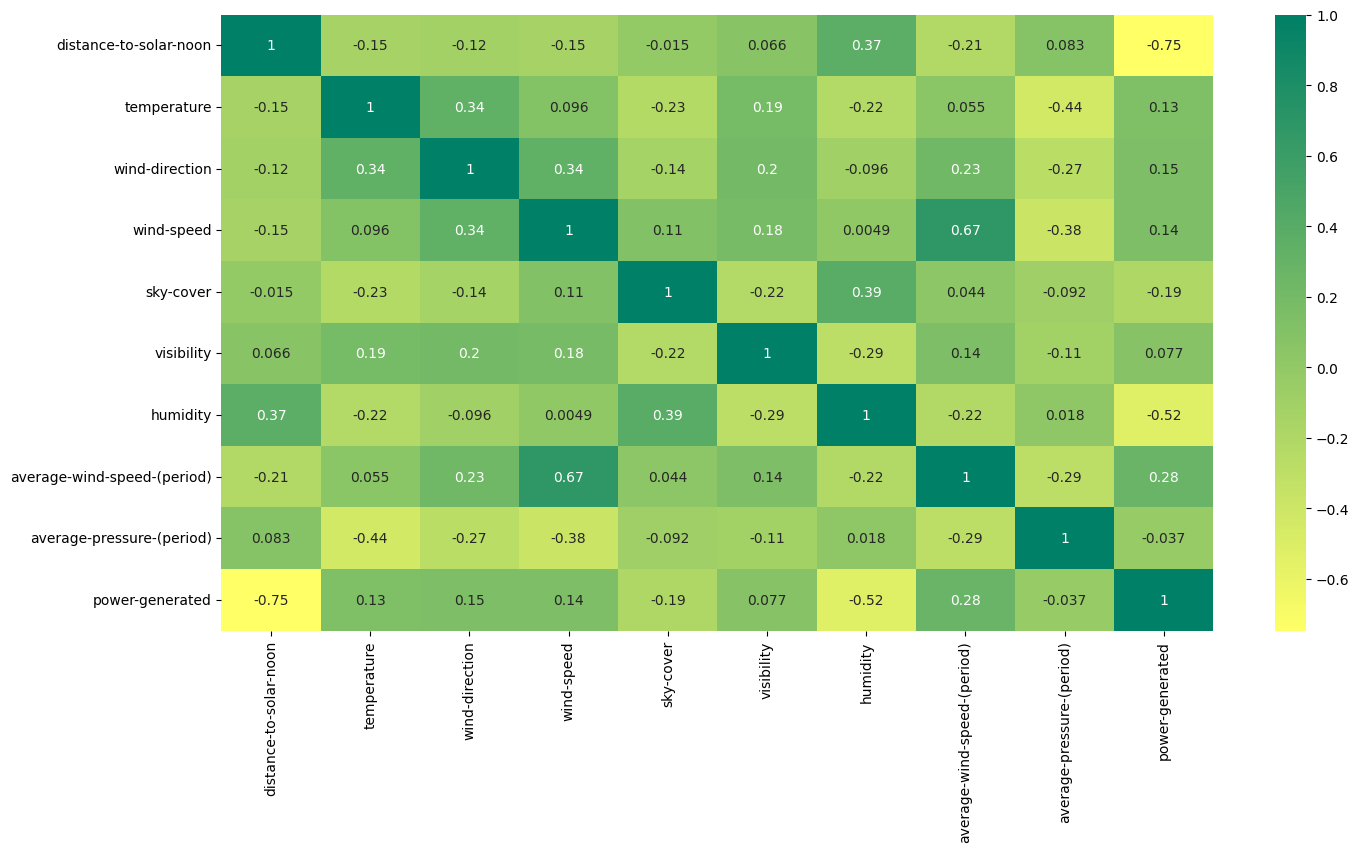

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='summer_r')
plt.show()

                       Feature  Mutual Information
0       distance-to-solar-noon            1.223122
6                     humidity            0.246881
7  average-wind-speed-(period)            0.126721
4                    sky-cover            0.070922
2               wind-direction            0.053387
1                  temperature            0.053302
5                   visibility            0.037475
8    average-pressure-(period)            0.004432
3                   wind-speed            0.000000


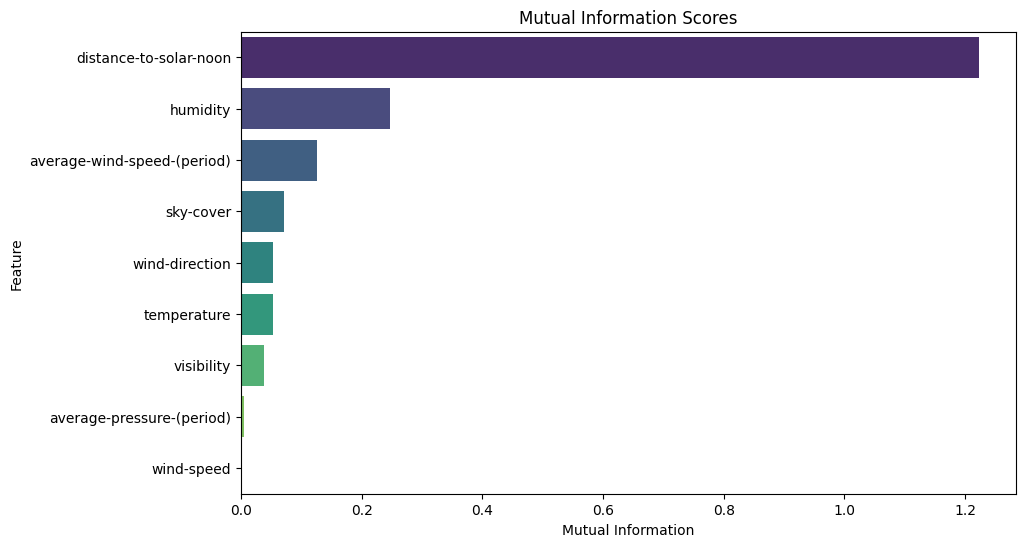

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information
mi_scores = mutual_info_regression(df[['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)']], df['power-generated'])

# Create a DataFrame for visualization
mi_df = pd.DataFrame({'Feature': ['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)'],
                   'Mutual Information': mi_scores})

# Sort the DataFrame by mutual information scores
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


# Plot the mutual information scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df, palette='viridis')
plt.title('Mutual Information Scores')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.show()


In [12]:
def outlier_handling(X):
    # Convert to DataFrame if input is a NumPy array
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)

    X = X.copy()  # Avoid modifying original data
    for col in X.columns:
        q1 = X[col].quantile(0.25)
        q3 = X[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        X[col] = X[col].clip(lower_bound, upper_bound)
    #Return a DataFrame instead of NumPy array
    return X

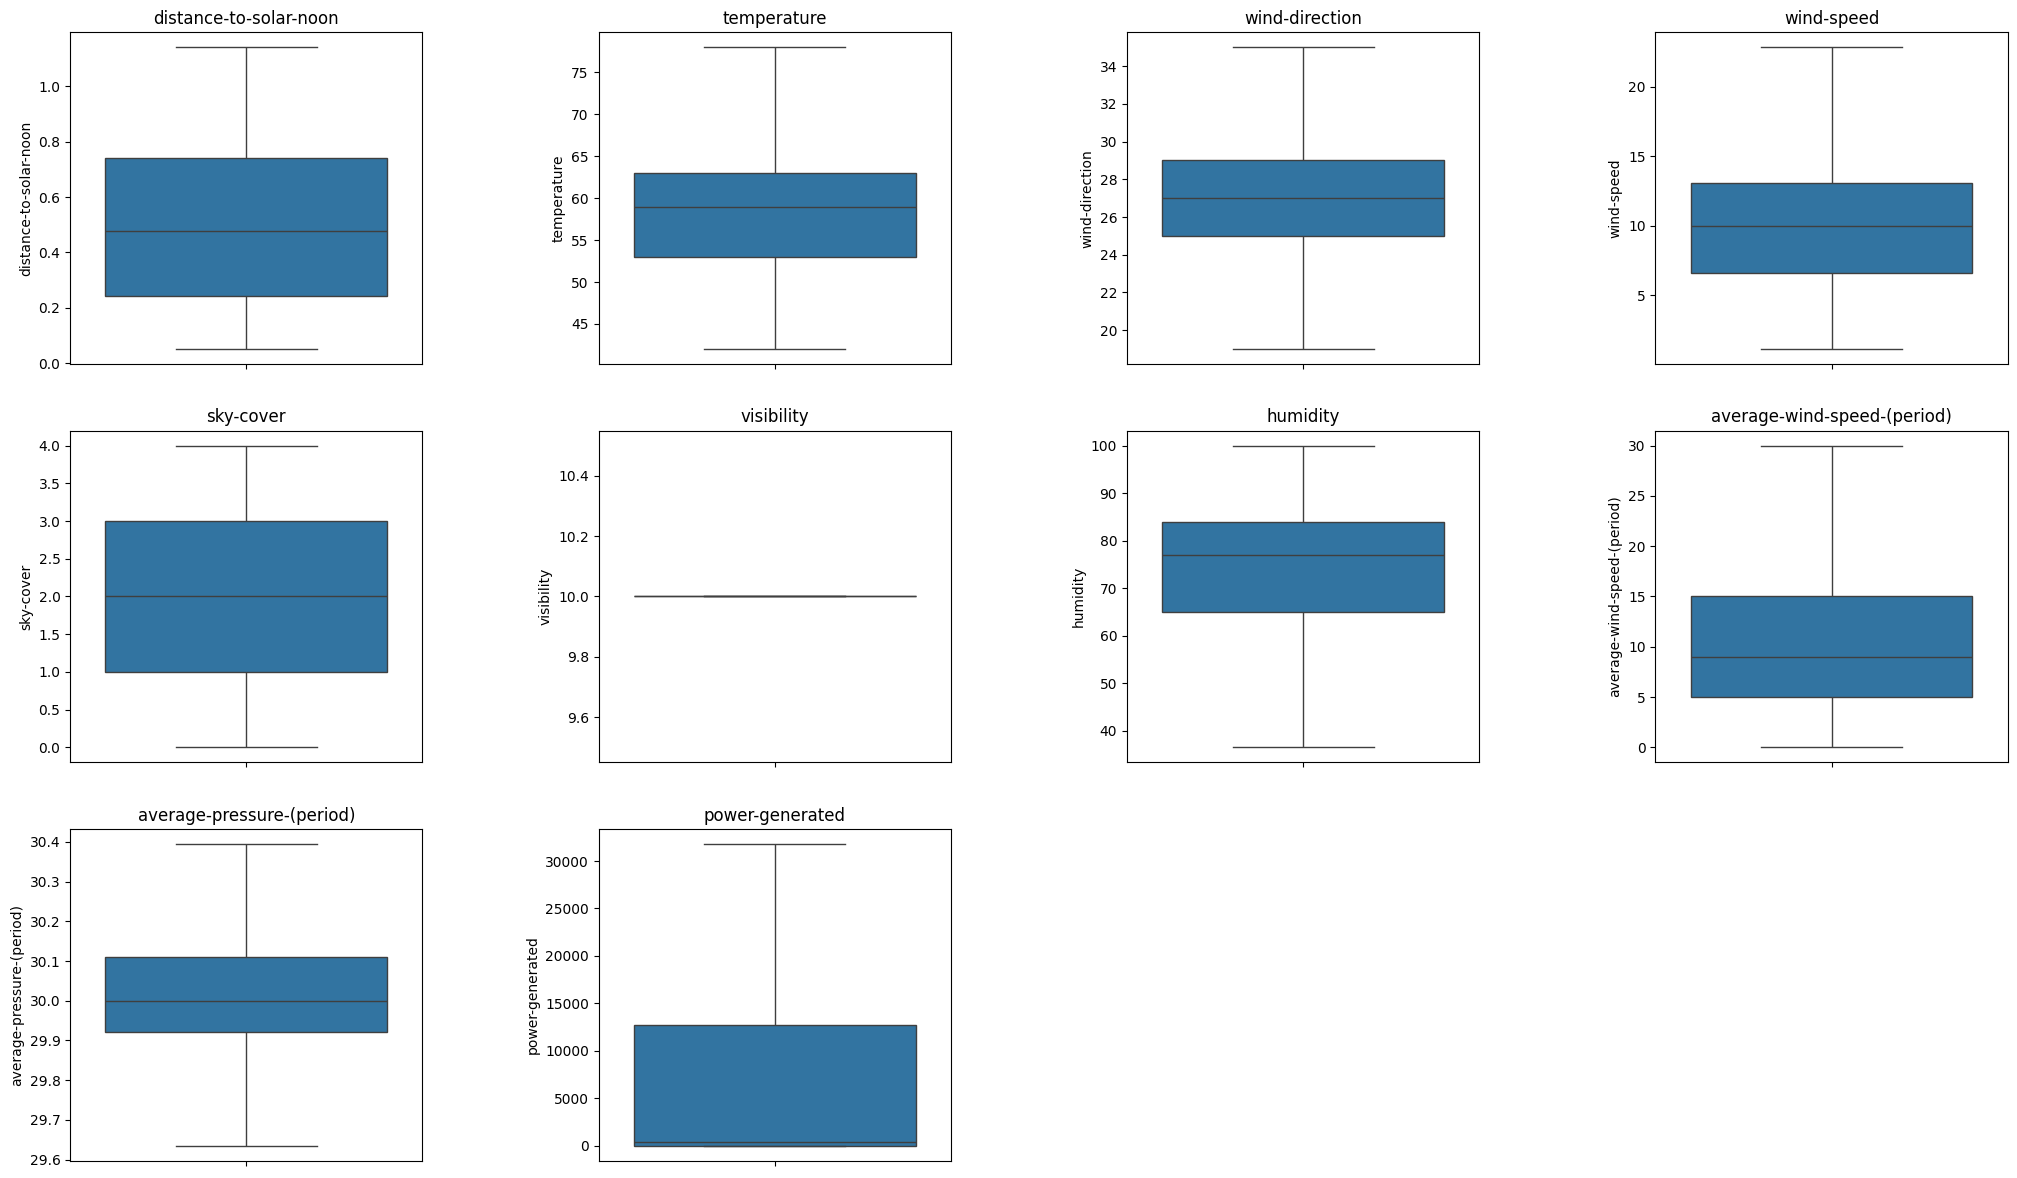

In [ ]:
plt.figure(figsize=(25, 25))  # Adjust figure size
plt.subplots_adjust(wspace=0.5)

# Loop through columns and create a subplot for each
for i, col in enumerate(df.columns):
    plt.subplot(5, 4, i+1)  # Create a subplot (8 rows, 3 columns grid)
    sns.boxplot(y=col, data=df)  # Plot the boxplot for each column
    plt.title(col)  # Set title for each subplot

# Show the plot
plt.show()

In [13]:
X=df.drop(["power-generated","visibility"],axis=1)
y=df["power-generated"]

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

### Using Pipeline

In [19]:
# Define numerical and categorical features if needed
num_features = X_train.select_dtypes(include=['float64', 'int64']).columns
# cat_features = X_train.select_dtypes(include=['object']).columns  # If you have any

# Create pipeline steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier_handling', FunctionTransformer(outlier_handling)),  # Assuming outlier_handling function is defined
    ('scaler', StandardScaler()),
])

# If you have categorical features, add a categorical transformer:
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore')),
# ])




In [20]:
preprocessing=ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        # ('cat', categorical_transformer, cat_features)  # If you have categorical features
    ])

In [21]:
X_train_preprocessed=preprocessing.fit_transform(X_train)
X_test_preprocessed=preprocessing.transform(X_test)

In [22]:
X_train_preprocessed.shape

(2336, 8)

### MODEL BULIDING

### Model Evaluation Function

In [82]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

In [83]:
#dictionary to store results
results={}

### Linear Regression

In [84]:
lr=LinearRegression()
lr.fit(X_train_preprocessed,y_train)
results["Linear Regression"]=evaluate_model(lr,X_test_preprocessed,y_test)

### LASSO

In [85]:
la=Lasso()

la_params={'alpha': [0.001, 0.01, 0.1, 1, 10]}

la_grid=GridSearchCV(la,la_params,cv=5)
la_grid.fit(X_train_preprocessed,y_train)
results["Lasso"]=evaluate_model(la_grid.best_estimator_,X_test_preprocessed,y_test)

### Ridge

In [86]:
ri=Ridge()

ri_params={'alpha': [0.001, 0.01, 0.1, 1, 10]}

ri_grid=GridSearchCV(ri,ri_params,cv=5)
ri_grid.fit(X_train_preprocessed,y_train)
results["Ridge"]=evaluate_model(ri_grid.best_estimator_,X_test_preprocessed,y_test)

### Decision Tree

In [87]:
dt=DecisionTreeRegressor()

dt_params = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dt_grid = GridSearchCV(dt, dt_params, cv=5)
dt_grid.fit(X_train_preprocessed, y_train)
results["Decision Tree"]=evaluate_model(dt_grid.best_estimator_,X_test_preprocessed,y_test)


### Random Forest

In [89]:
rf=RandomForestRegressor()

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(rf, rf_params, cv=5,n_jobs=-1)
rf_grid.fit(X_train_preprocessed, y_train)
results["Random Forest"]=evaluate_model(rf_grid.best_estimator_,X_test_preprocessed,y_test)

### XGBoost

In [90]:
xgb=XGBRegressor()

xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, n_jobs=-1)
xgb_grid.fit(X_train_preprocessed, y_train)
results["XGBoost"]=evaluate_model(xgb_grid.best_estimator_,X_test_preprocessed,y_test)


### KNN

In [91]:
knn=KNeighborsRegressor()

knn_params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train_preprocessed, y_train)
results["KNN"]=evaluate_model(knn_grid.best_estimator_,X_test_preprocessed,y_test)

#### Hyperparameter Tunnning results

In [92]:
# Convert results to DataFrame
df_results = pd.DataFrame(results, index=['R² Score', 'MAE', 'MSE',"RMSE"]).T
df_results

,R² Score,MAE,MSE,RMSE
Linear Regression,0.648650,4984.511606,3.932168e+07,6270.699896
Lasso,0.648884,4983.895442,3.929542e+07,6268.605766
Ridge,0.648495,4983.069732,3.933896e+07,6272.078191
Decision Tree,0.876451,1907.287968,1.382709e+07,3718.479421
Random Forest,0.917606,1568.308168,9.221211e+06,3036.644687
XGBoost,0.915191,1636.977905,9.491444e+06,3080.818722
KNN,0.861015,2284.165264,1.555467e+07,3943.941380


In [94]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

### Final Pipeline

In [98]:
pipeline=Pipeline([
    ('preprocessing',preprocessing),
    ('model',RandomForestRegressor(max_depth=None,max_features="log2",min_samples_leaf=1,min_samples_split=2,n_estimators=200))
])

In [99]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outlier_handling',
                                                                   FunctionTransformer(func=<function outlier_handling at 0x79ac8655eb60>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)'],
      dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_features='log2', n_estimators=200))])

In [100]:
y_pred=pipeline.predict(X_test)

In [101]:
final_results={}

r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

final_results["R² Score"]=r2
final_results["MAE"]=mae
final_results["MSE"]=mse
final_results["RMSE"]=rmse


final_results=pd.DataFrame(final_results,index=[0])
final_results

,R² Score,MAE,MSE,RMSE
0,0.916985,1558.125599,9.290646e+06,3048.056132
